# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy
import networkx as nx
from netrd.distance import Hamming, Frobenius, JaccardDistance, NetSimile, GraphDiffusion

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import atlasMapping
import fixedDensity as fd

# Set Directory Paths

In [3]:
# Only used to load the FTDGeneralData_20221114.mat file --> Saved as NetworkDataGeneral
%store -r baseDir

# Directory path to load formatted gfap_ferritin_dataDir Data
%store -r gfap_ferritin_dataDir

# Directory path to save Calcualted Analysis Data
%store -r gfap_ferritin_CalData

# Directory path to save Figures
%store -r gfap_ferritin_Fig

In [4]:
graphDir = '/Users/hyroh/Desktop/FTD_Research/mBIN/FTD_JupyterNotebook/GFAP_Ferritin_Analysis/Graphs'

# Loading Data

## Preconstructed Atlas Data

In [5]:
# loads the preconstructed Atlas data
NetworkDataGeneral = scipy.io.loadmat(os.path.join(baseDir, 'NetworkAnalysisGeneral', 'FTDGeneralData_20221114.mat'))

## Covariance Matrices

### GFAP

In [6]:
# covGFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_Drop.pkl'), 'rb') as f:
    covGFAP_TAU_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_Drop.pkl'), 'rb') as f:
    covGFAP_TDP_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TAU_gt_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_gt_TDP_Drop.pkl'), 'rb') as f:
    covGFAP_TAU_gt_TDP_Drop = pickle.load(f)
f.close()
# covGFAP_TDP_gt_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_gt_TAU_Drop.pkl'), 'rb') as f:
    covGFAP_TDP_gt_TAU_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TAU_gt_TDP_raw_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_gt_TDP_raw_Drop.pkl'), 'rb') as f:
    covGFAP_TAU_gt_TDP_raw_Drop = pickle.load(f)
f.close()
# covGFAP_TDP_gt_TAU_raw_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_gt_TAU_raw_Drop.pkl'), 'rb') as f:
    covGFAP_TDP_gt_TAU_raw_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------

### Ferritin

In [7]:
# covFerr_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TAU_Drop.pkl'), 'rb') as f:
    covFerr_TAU_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covFerr_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TDP_Drop.pkl'), 'rb') as f:
    covFerr_TDP_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covFerr_TAU_gt_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TAU_gt_TDP_Drop.pkl'), 'rb') as f:
    covFerr_TAU_gt_TDP_Drop = pickle.load(f)
f.close()
# covFerr_TDP_gt_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TDP_gt_TAU_Drop.pkl'), 'rb') as f:
    covFerr_TDP_gt_TAU_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covFerr_TAU_gt_TDP_raw_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TAU_gt_TDP_raw_Drop.pkl'), 'rb') as f:
    covFerr_TAU_gt_TDP_raw_Drop = pickle.load(f)
f.close()
# covFerr_TDP_gt_TAU_raw_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covFerr_TDP_gt_TAU_raw_Drop.pkl'), 'rb') as f:
    covFerr_TDP_gt_TAU_raw_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------

### Pathology (Matching GFAP Regions)

In [8]:
# cov_TAU_Drop_GFAP
with open(os.path.join(gfap_ferritin_CalData, 'cov_TAU_Drop_GFAP.pkl'), 'rb') as f:
    cov_TAU_Drop_GFAP = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# cov_TDP_Drop_GFAP
with open(os.path.join(gfap_ferritin_CalData, 'cov_TDP_Drop_GFAP.pkl'), 'rb') as f:
    cov_TDP_Drop_GFAP = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# cov_TAU_gt_TDP_Drop_GFAP
with open(os.path.join(gfap_ferritin_CalData, 'cov_TAU_gt_TDP_Drop_GFAP.pkl'), 'rb') as f:
    cov_TAU_gt_TDP_Drop_GFAP = pickle.load(f)
f.close()
# cov_TDP_gt_TAU_Drop_GFAP
with open(os.path.join(gfap_ferritin_CalData, 'cov_TDP_gt_TAU_Drop_GFAP.pkl'), 'rb') as f:
    cov_TDP_gt_TAU_Drop_GFAP = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# cov_TAU_gt_TDP_raw_Drop_GFAP
with open(os.path.join(gfap_ferritin_CalData, 'cov_TAU_gt_TDP_raw_Drop_GFAP.pkl'), 'rb') as f:
    cov_TAU_gt_TDP_raw_Drop_GFAP = pickle.load(f)
f.close()
# cov_TDP_gt_TAU_raw_Drop_GFAP
with open(os.path.join(gfap_ferritin_CalData, 'cov_TDP_gt_TAU_raw_Drop_GFAP.pkl'), 'rb') as f:
    cov_TDP_gt_TAU_raw_Drop_GFAP = pickle.load(f)
f.close()
#----------------------------------------------------------------------------

### Pathology (Matching Ferritin Regions)

In [9]:
# cov_TAU_Drop_Ferr
with open(os.path.join(gfap_ferritin_CalData, 'cov_TAU_Drop_Ferr.pkl'), 'rb') as f:
    cov_TAU_Drop_Ferr = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# cov_TDP_Drop_Ferr
with open(os.path.join(gfap_ferritin_CalData, 'cov_TDP_Drop_Ferr.pkl'), 'rb') as f:
    cov_TDP_Drop_Ferr = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# cov_TAU_gt_TDP_Drop_Ferr
with open(os.path.join(gfap_ferritin_CalData, 'cov_TAU_gt_TDP_Drop_Ferr.pkl'), 'rb') as f:
    cov_TAU_gt_TDP_Drop_Ferr = pickle.load(f)
f.close()
# cov_TDP_gt_TAU_Drop_Ferr
with open(os.path.join(gfap_ferritin_CalData, 'cov_TDP_gt_TAU_Drop_Ferr.pkl'), 'rb') as f:
    cov_TDP_gt_TAU_Drop_Ferr = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# cov_TAU_gt_TDP_raw_Drop_Ferr
with open(os.path.join(gfap_ferritin_CalData, 'cov_TAU_gt_TDP_raw_Drop_Ferr.pkl'), 'rb') as f:
    cov_TAU_gt_TDP_raw_Drop_Ferr = pickle.load(f)
f.close()
# cov_TDP_gt_TAU_raw_Drop_Ferr
with open(os.path.join(gfap_ferritin_CalData, 'cov_TDP_gt_TAU_raw_Drop_Ferr.pkl'), 'rb') as f:
    cov_TDP_gt_TAU_raw_Drop_Ferr = pickle.load(f)
f.close()
#----------------------------------------------------------------------------

## Log %AO

### GFAP

In [10]:
# GFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'GFAP_TAU_Drop.pkl'), 'rb') as f:
    GFAP_TAU_Drop = pickle.load(f)
f.close()

# GFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'GFAP_TDP_Drop.pkl'), 'rb') as f:
    GFAP_TDP_Drop = pickle.load(f)
f.close()

### Ferriting

In [11]:
# Ferr_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'Ferr_TAU_Drop.pkl'), 'rb') as f:
    Ferr_TAU_Drop = pickle.load(f)
f.close()

# Ferr_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'Ferr_TDP_Drop.pkl'), 'rb') as f:
    Ferr_TDP_Drop = pickle.load(f)
f.close()

### Pathology (Matching GFAP Regions)

In [12]:
# PATH_TAU_Drop_GFAP
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TAU_Drop_GFAP.pkl'), 'rb') as f:
    PATH_TAU_Drop_GFAP = pickle.load(f)
f.close()

# PATH_TDP_Drop_GFAP
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TDP_Drop_GFAP.pkl'), 'rb') as f:
    PATH_TDP_Drop_GFAP = pickle.load(f)
f.close()

### Pathology (Matching Ferritin Regions)

In [13]:
# PATH_TAU_Drop_Ferr
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TAU_Drop_Ferr.pkl'), 'rb') as f:
    PATH_TAU_Drop_Ferr = pickle.load(f)
f.close()

# PATH_TDP_Drop_Ferr
with open(os.path.join(gfap_ferritin_dataDir, 'PATH_TDP_Drop_Ferr.pkl'), 'rb') as f:
    PATH_TDP_Drop_Ferr = pickle.load(f)
f.close()

## Labels

In [14]:
# LabelNames_GFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames_GFAP_TAU_Drop.pkl'), 'rb') as f:
    LabelNames_GFAP_TAU_Drop = pickle.load(f)
f.close()

# LabelNames_GFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames_GFAP_TDP_Drop.pkl'), 'rb') as f:
    LabelNames_GFAP_TDP_Drop = pickle.load(f)
f.close()

# LabelNames_Ferr_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames_Ferr_TAU_Drop.pkl'), 'rb') as f:
    LabelNames_Ferr_TAU_Drop = pickle.load(f)
f.close()

# LabelNames_Ferr_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames_Ferr_TDP_Drop.pkl'), 'rb') as f:
    LabelNames_Ferr_TDP_Drop = pickle.load(f)

## CoM

In [15]:
# CoM_GFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'CoM_GFAP_TAU_Drop.pkl'), 'rb') as f:
    CoM_GFAP_TAU_Drop = pickle.load(f)
f.close()

# CoM_GFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'CoM_GFAP_TDP_Drop.pkl'), 'rb') as f:
    CoM_GFAP_TDP_Drop = pickle.load(f)
f.close()

# CoM_Ferr_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'CoM_Ferr_TAU_Drop.pkl'), 'rb') as f:
    CoM_Ferr_TAU_Drop = pickle.load(f)
f.close()

# CoM_Ferr_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'CoM_Ferr_TDP_Drop.pkl'), 'rb') as f:
    CoM_Ferr_TDP_Drop = pickle.load(f)
f.close()

# Draw 3D Atlas Map

## [Pathology matching GFAP Regions] Define Variables

### Define Vectors for Node Size and Node Color

In [16]:
# Log %AO of FTD TAU vs TDP
path_TAU_exp = PATH_TAU_Drop_GFAP.copy()
path_TDP_exp = PATH_TDP_Drop_GFAP.copy()

# Get min/max %AO of LBD
minPath = np.nanmin(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())))
maxPath = np.nanmax(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())) - minPath + 0.0015, axis=0)

# Size of Nodes --> Marker
markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
markerVecTAU = 3 * (markerVecTAU - minPath) / maxPath

markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
markerVecTDP = 3 * (markerVecTDP - minPath) / maxPath

cRange = [0, 1]

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(path_TAU_exp.shape[1])
colorVecTDP = np.ones(path_TDP_exp.shape[1])

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_48715/4265758310.py:10: RuntimeWarning: Mean of empty slice
  markerVecTAU = np.nanmean(path_TAU_exp, axis=0)


## TAU

/Users/hyroh/Desktop/FTD_Research/mBIN/FTD_JupyterNotebook/HelperFunctions/Analysis_HelperFuntions/atlasMapping.py:163: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # Makes the mapping tighter --> Bigger


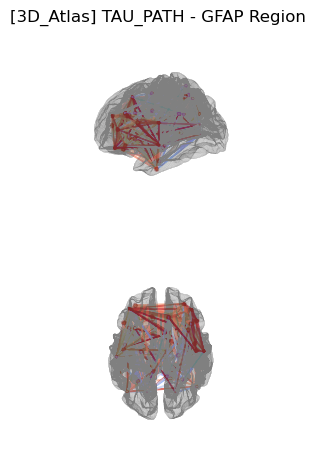

In [17]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_TAU_Drop_GFAP, CoM_GFAP_TAU_Drop, LabelNames_GFAP_TAU_Drop, 
                          markerVecTAU, colorVecTAU, gfap_ferritin_Fig, 
                          '[3D_Atlas] TAU_PATH - GFAP Region', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

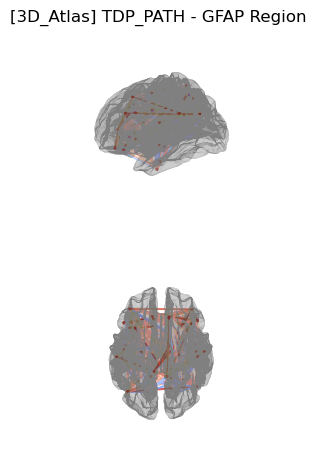

In [18]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_TDP_Drop_GFAP, CoM_GFAP_TDP_Drop, LabelNames_GFAP_TDP_Drop, 
                          markerVecTDP, colorVecTDP, gfap_ferritin_Fig, 
                          '[3D_Atlas] TDP_PATH - GFAP Region', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## [Pathology matching Ferr Regions] Define Variables

### Define Vectors for Node Size and Node Color

In [19]:
# Log %AO of FTD TAU vs TDP
path_TAU_exp = PATH_TAU_Drop_Ferr.copy()
path_TDP_exp = PATH_TDP_Drop_Ferr.copy()

# Get min/max %AO of LBD
minPath = np.nanmin(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())))
maxPath = np.nanmax(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())) - minPath + 0.0015, axis=0)

# Size of Nodes --> Marker
markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
markerVecTAU = 3 * (markerVecTAU - minPath) / maxPath

markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
markerVecTDP = 3 * (markerVecTDP - minPath) / maxPath

cRange = [0, 1]

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(path_TAU_exp.shape[1])
colorVecTDP = np.ones(path_TDP_exp.shape[1])

## TAU

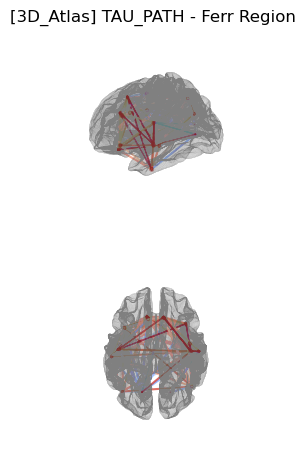

In [20]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_TAU_Drop_Ferr, CoM_Ferr_TAU_Drop, LabelNames_Ferr_TAU_Drop, 
                          markerVecTAU, colorVecTAU, gfap_ferritin_Fig, 
                          '[3D_Atlas] TAU_PATH - Ferr Region', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

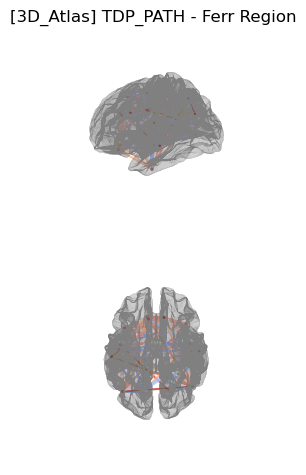

In [21]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_TDP_Drop_Ferr, CoM_Ferr_TDP_Drop, LabelNames_Ferr_TDP_Drop, 
                          markerVecTDP, colorVecTDP, gfap_ferritin_Fig, 
                          '[3D_Atlas] TDP_PATH - Ferr Region', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

# Graph Analysis

In [16]:
graphDir = os.getcwd() + '/Graphs'

## Pathology -  Save Graph Networks

### TAU - Matching GFAP

In [17]:
PATH_TAU_GFAP_G = atlasMapping.save3DGraph(cov_TAU_Drop_GFAP, graphDir, 'PATH_TAU_GFAP')

### TAU - Matching Ferr

In [18]:
PATH_TAU_Ferr_G = atlasMapping.save3DGraph(cov_TAU_Drop_Ferr, graphDir, 'PATH_TAU_Ferr')

### TDP - Matching GFAP

In [19]:
PATH_TDP_GFAP_G = atlasMapping.save3DGraph(cov_TDP_Drop_GFAP, graphDir, 'PATH_TDP_GFAP')

### TDP - Matching Ferr

In [20]:
PATH_TDP_Ferr_G = atlasMapping.save3DGraph(cov_TDP_Drop_Ferr, graphDir, 'PATH_TDP_Ferr')

## GFAP -  Save Graph Networks

### GFAP (for TAU)

In [21]:
TAU_GFAP_G = atlasMapping.save3DGraph(covGFAP_TAU_Drop, graphDir, 'TAU_GFAP')

### GFAP (for TDP)

In [22]:
TDP_GFAP_G = atlasMapping.save3DGraph(covGFAP_TDP_Drop, graphDir, 'TDP_GFAP')

## Ferritin -  Save Graph Networks

### Ferritin (for TAU)

In [23]:
TAU_Ferr_G = atlasMapping.save3DGraph(covFerr_TAU_Drop, graphDir, 'TAU_Ferr')

### Ferritin (for TDP)

In [24]:
TDP_Ferr_G = atlasMapping.save3DGraph(covFerr_TDP_Drop, graphDir, 'TDP_Ferr')

## Goodness of Fit

In [25]:
def distanceGraph(G1, G2, G3, G4, method, protein_type):
    if method == "hamming":
        dist_obj = Hamming()
    elif method == "frob":
        dist_obj = Frobenius()
    elif method == 'jacc':
        dist_obj = JaccardDistance()
    elif method == 'NetSimile':
        dist_obj = NetSimile()
    elif method == "graphdiff":
        dist_obj = GraphDiffusion()

    dis_1_2 = dist_obj.dist(G1, G2)
    dis_1_3 = dist_obj.dist(G1, G3)
    dis_1_4 = dist_obj.dist(G1, G4)
    dis_2_3 = dist_obj.dist(G2, G3)
    dis_2_4 = dist_obj.dist(G2, G4)
    dis_3_4 = dist_obj.dist(G3, G4)

    print(protein_type)
    print(f"Distance between [Pathology TAU] vs [Pathology TDP]: {dis_1_2}")
    print(f"** Distance between [Pathology TAU] vs [{protein_type} TAU]: {dis_1_3}")
    print(f"Distance between [Pathology TAU] vs [{protein_type} TDP]: {dis_1_4}")
    
    print(f"Distance between [Pathology TDP] vs [{protein_type} TAU]: {dis_2_3}")
    print(f"** Distance between [Pathology TDP] vs [{protein_type} TDP]: {dis_2_4}")
    
    print(f"Distance between [{protein_type} TAU] vs [{protein_type} TDP]: {dis_3_4}")

### Ferritin

#### Hamming Distance

In [26]:
distanceGraph(PATH_TAU_Ferr_G, PATH_TDP_Ferr_G, 
              TAU_Ferr_G, TDP_Ferr_G, method="hamming", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 0.19166666666666668
** Distance between [Pathology TAU] vs [Ferritin TAU]: 0.31666666666666665
Distance between [Pathology TAU] vs [Ferritin TDP]: 0.5
Distance between [Pathology TDP] vs [Ferritin TAU]: 0.3416666666666667
** Distance between [Pathology TDP] vs [Ferritin TDP]: 0.5083333333333333
Distance between [Ferritin TAU] vs [Ferritin TDP]: 0.38333333333333336


/Users/hyroh/anaconda3/envs/Network_Analysis/lib/python3.11/site-packages/netrd/utilities/graph.py:118: RuntimeWarning: Coercing weighted graph to unweighted.
  warnings.warn("Coercing weighted graph to unweighted.", RuntimeWarning)


#### Frobenius Distance

In [27]:
distanceGraph(PATH_TAU_Ferr_G, PATH_TDP_Ferr_G, 
              TAU_Ferr_G, TDP_Ferr_G, method="frob", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 6.782329983125268
** Distance between [Pathology TAU] vs [Ferritin TAU]: 8.717797887081348
Distance between [Pathology TAU] vs [Ferritin TDP]: 10.954451150103322
Distance between [Pathology TDP] vs [Ferritin TAU]: 9.055385138137417
** Distance between [Pathology TDP] vs [Ferritin TDP]: 11.045361017187261
Distance between [Ferritin TAU] vs [Ferritin TDP]: 9.591663046625438


#### JaccardDistance (Jaccard distance between edge sets)

In [28]:
distanceGraph(PATH_TAU_Ferr_G, PATH_TDP_Ferr_G, 
              TAU_Ferr_G, TDP_Ferr_G, method="jacc", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 0.22330097087378642
** Distance between [Pathology TAU] vs [Ferritin TAU]: 0.3917525773195877
Distance between [Pathology TAU] vs [Ferritin TDP]: 0.6
Distance between [Pathology TDP] vs [Ferritin TAU]: 0.40594059405940597
** Distance between [Pathology TDP] vs [Ferritin TDP]: 0.5922330097087378
Distance between [Ferritin TAU] vs [Ferritin TDP]: 0.5609756097560976


#### NetSimile (Compares node signature distributions.)

In [29]:
distanceGraph(PATH_TAU_Ferr_G, PATH_TDP_Ferr_G, 
              TAU_Ferr_G, TDP_Ferr_G, method="NetSimile", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 4.986893936665077
** Distance between [Pathology TAU] vs [Ferritin TAU]: 13.783774915147122
Distance between [Pathology TAU] vs [Ferritin TDP]: 17.55217606648323
Distance between [Pathology TDP] vs [Ferritin TAU]: 14.429307282756236
** Distance between [Pathology TDP] vs [Ferritin TDP]: 18.177849612463017
Distance between [Ferritin TAU] vs [Ferritin TDP]: 14.429103313760148


#### GraphDiffusion (Find the maximally dissimilar diffusion kernels between two graphs)

In [30]:
distanceGraph(PATH_TAU_Ferr_G, PATH_TDP_Ferr_G, 
              TAU_Ferr_G, TDP_Ferr_G, method="graphdiff", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 0.6330999342812367
** Distance between [Pathology TAU] vs [Ferritin TAU]: 1.1225577086771907
Distance between [Pathology TAU] vs [Ferritin TDP]: 1.691801915377071
Distance between [Pathology TDP] vs [Ferritin TAU]: 0.9200192812839381
** Distance between [Pathology TDP] vs [Ferritin TDP]: 1.4687092779554942
Distance between [Ferritin TAU] vs [Ferritin TDP]: 1.0288451628890816


# Fix # of Edges

In [31]:
print(np.count_nonzero(cov_TAU_Drop_Ferr)/2)
print(np.count_nonzero(cov_TDP_Drop_Ferr)/2)
print(np.count_nonzero(covFerr_TAU_Drop)/2)
print(np.count_nonzero(covFerr_TDP_Drop)/2)

89.0
94.0
67.0
51.0


In [32]:
def fixedDensity_corr(covMat, N):
    # Retunr a upper triangle of covMat with smallest N values
    
    # Substitute NaN values in covMat to 0
    covMat[np.isnan(covMat)] = 0

    # Get upper triangle of covMat
    covMat = np.triu(covMat)

    # Get the non-zero part (used for drawing the edge)
    relevant_elements = covMat[covMat != 0]

    # Sort and get the biggest n values
    elements_extract = np.sort(relevant_elements)[::-1][:N] 

    # Create a boolean mask where True corresponds to the values in the list
    mask = np.isin(covMat, elements_extract)

    # Set everything else to zero (keep only the smallest n values)
    covMat[~mask] = 0
    
    return covMat

In [33]:
# Set to 50 edges
cov_TAU_Drop_Ferr = fixedDensity_corr(cov_TAU_Drop_Ferr, N=30)
cov_TDP_Drop_Ferr = fixedDensity_corr(cov_TDP_Drop_Ferr, N=30)

covFerr_TAU_Drop = fixedDensity_corr(covFerr_TAU_Drop, N=30)
covFerr_TDP_Drop = fixedDensity_corr(covFerr_TDP_Drop, N=30)

## [Pathology matching Ferr Regions] Define Variables

### Define Vectors for Node Size and Node Color

In [34]:
# Log %AO of FTD TAU vs TDP
path_TAU_exp = PATH_TAU_Drop_Ferr.copy()
path_TDP_exp = PATH_TDP_Drop_Ferr.copy()

# Get min/max %AO of LBD
minPath = np.nanmin(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())))
maxPath = np.nanmax(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())) - minPath + 0.0015, axis=0)

# Size of Nodes --> Marker
markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
markerVecTAU = 3 * (markerVecTAU - minPath) / maxPath

markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
markerVecTDP = 3 * (markerVecTDP - minPath) / maxPath

cRange = [0, 1]

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(path_TAU_exp.shape[1])
colorVecTDP = np.ones(path_TDP_exp.shape[1])

## TAU

/Users/hyroh/Desktop/FTD_Research/mBIN/FTD_JupyterNotebook/HelperFunctions/Analysis_HelperFuntions/atlasMapping.py:165: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # Makes the mapping tighter --> Bigger


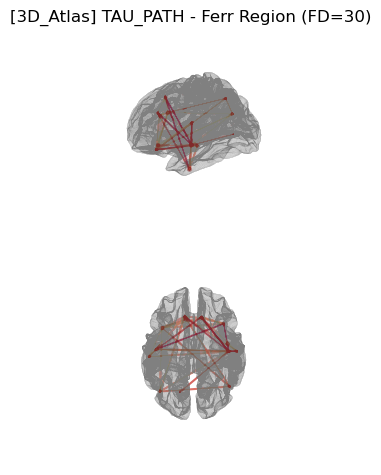

In [35]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_TAU_Drop_Ferr, CoM_Ferr_TAU_Drop, LabelNames_Ferr_TAU_Drop, 
                          markerVecTAU, colorVecTAU, gfap_ferritin_Fig, 
                          '[3D_Atlas] TAU_PATH - Ferr Region (FD=30)', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

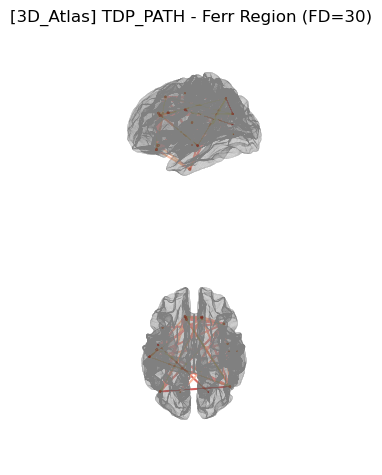

In [36]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_TDP_Drop_Ferr, CoM_Ferr_TDP_Drop, LabelNames_Ferr_TDP_Drop, 
                          markerVecTDP, colorVecTDP, gfap_ferritin_Fig, 
                          '[3D_Atlas] TDP_PATH - Ferr Region (FD=30)', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## [Ferr] Define Variables

### Define Vectors for Node Size and Node Color

In [37]:
# Log %AO of FTD TAU vs TDP
path_TAU_exp = Ferr_TAU_Drop.copy()
path_TDP_exp = Ferr_TDP_Drop.copy()

# Get min/max %AO of LBD
minPath = np.nanmin(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())))
maxPath = np.nanmax(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())) - minPath + 0.0015, axis=0)

# Size of Nodes --> Marker
markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
markerVecTAU = 3 * (markerVecTAU - minPath) / maxPath

markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
markerVecTDP = 3 * (markerVecTDP - minPath) / maxPath

cRange = [0, 1]

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(path_TAU_exp.shape[1])
colorVecTDP = np.ones(path_TDP_exp.shape[1])

## TAU

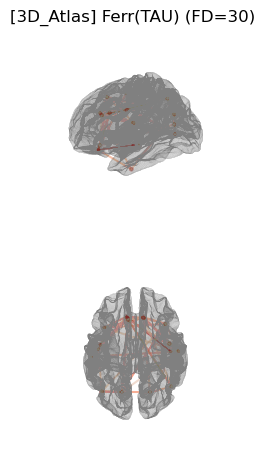

In [38]:
atlasMapping.atlasMapping(NetworkDataGeneral, covFerr_TAU_Drop, CoM_Ferr_TAU_Drop, LabelNames_Ferr_TAU_Drop, 
                          markerVecTAU, colorVecTAU, gfap_ferritin_Fig, 
                          '[3D_Atlas] Ferr(TAU) (FD=30)', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

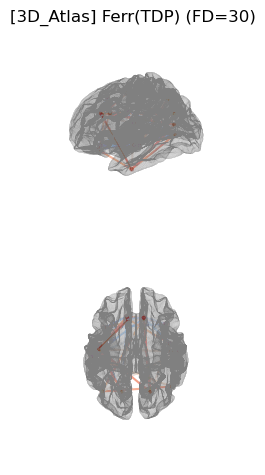

In [39]:
atlasMapping.atlasMapping(NetworkDataGeneral, covFerr_TDP_Drop, CoM_Ferr_TDP_Drop, LabelNames_Ferr_TDP_Drop, 
                          markerVecTDP, colorVecTDP, gfap_ferritin_Fig, 
                          '[3D_Atlas] Ferr(TDP) (FD=30)', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

# Graph Analysis

In [40]:
graphDir = os.getcwd() + '/Graphs'

## Pathology -  Save Graph Networks

### TAU - Matching Ferr

In [41]:
PATH_TAU_Ferr_G = atlasMapping.save3DGraph(cov_TAU_Drop_Ferr, graphDir, 'PATH_TAU_Ferr (FD=50)')

### TDP - Matching Ferr

In [42]:
PATH_TDP_Ferr_G = atlasMapping.save3DGraph(cov_TDP_Drop_Ferr, graphDir, 'PATH_TDP_Ferr (FD=50)')

## Ferritin -  Save Graph Networks

### Ferritin (for TAU)

In [43]:
TAU_Ferr_G = atlasMapping.save3DGraph(covFerr_TAU_Drop, graphDir, 'TAU_Ferr (FD=50)')

### Ferritin (for TDP)

In [44]:
TDP_Ferr_G = atlasMapping.save3DGraph(covFerr_TDP_Drop, graphDir, 'TDP_Ferr (FD=50)')

In [45]:
TDP_Ferr_G.number_of_edges()

30

## Goodness of Fit

In [46]:
def distanceGraph(G1, G2, G3, G4, method, protein_type):
    if method == "hamming":
        dist_obj = Hamming()
    elif method == "frob":
        dist_obj = Frobenius()
    elif method == 'jacc':
        dist_obj = JaccardDistance()
    elif method == 'NetSimile':
        dist_obj = NetSimile()
    elif method == "graphdiff":
        dist_obj = GraphDiffusion()

    dis_1_2 = dist_obj.dist(G1, G2)
    dis_1_3 = dist_obj.dist(G1, G3)
    dis_1_4 = dist_obj.dist(G1, G4)
    dis_2_3 = dist_obj.dist(G2, G3)
    dis_2_4 = dist_obj.dist(G2, G4)
    dis_3_4 = dist_obj.dist(G3, G4)

    print(protein_type)
    print(f"Distance between [Pathology TAU] vs [Pathology TDP]: {dis_1_2}")
    print(f"** Distance between [Pathology TAU] vs [{protein_type} TAU]: {dis_1_3}")
    print(f"Distance between [Pathology TAU] vs [{protein_type} TDP]: {dis_1_4}")
    
    print(f"Distance between [Pathology TDP] vs [{protein_type} TAU]: {dis_2_3}")
    print(f"** Distance between [Pathology TDP] vs [{protein_type} TDP]: {dis_2_4}")
    
    print(f"Distance between [{protein_type} TAU] vs [{protein_type} TDP]: {dis_3_4}")

### Ferritin

#### Hamming Distance

In [47]:
distanceGraph(PATH_TAU_Ferr_G, PATH_TDP_Ferr_G, 
              TAU_Ferr_G, TDP_Ferr_G, method="hamming", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 0.36666666666666664
** Distance between [Pathology TAU] vs [Ferritin TAU]: 0.38333333333333336
Distance between [Pathology TAU] vs [Ferritin TDP]: 0.3333333333333333
Distance between [Pathology TDP] vs [Ferritin TAU]: 0.38333333333333336
** Distance between [Pathology TDP] vs [Ferritin TDP]: 0.35
Distance between [Ferritin TAU] vs [Ferritin TDP]: 0.3333333333333333


#### Frobenius Distance

In [48]:
distanceGraph(PATH_TAU_Ferr_G, PATH_TDP_Ferr_G, 
              TAU_Ferr_G, TDP_Ferr_G, method="frob", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 9.38083151964686
** Distance between [Pathology TAU] vs [Ferritin TAU]: 9.591663046625438
Distance between [Pathology TAU] vs [Ferritin TDP]: 8.94427190999916
Distance between [Pathology TDP] vs [Ferritin TAU]: 9.591663046625438
** Distance between [Pathology TDP] vs [Ferritin TDP]: 9.16515138991168
Distance between [Ferritin TAU] vs [Ferritin TDP]: 8.94427190999916


#### JaccardDistance (Jaccard distance between edge sets)

In [49]:
distanceGraph(PATH_TAU_Ferr_G, PATH_TDP_Ferr_G, 
              TAU_Ferr_G, TDP_Ferr_G, method="jacc", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 0.8461538461538461
** Distance between [Pathology TAU] vs [Ferritin TAU]: 0.8679245283018868
Distance between [Pathology TAU] vs [Ferritin TDP]: 0.8
Distance between [Pathology TDP] vs [Ferritin TAU]: 0.8679245283018868
** Distance between [Pathology TDP] vs [Ferritin TDP]: 0.8235294117647058
Distance between [Ferritin TAU] vs [Ferritin TDP]: 0.8


#### NetSimile (Compares node signature distributions.)

In [50]:
distanceGraph(PATH_TAU_Ferr_G, PATH_TDP_Ferr_G, 
              TAU_Ferr_G, TDP_Ferr_G, method="NetSimile", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 6.101418050146628
** Distance between [Pathology TAU] vs [Ferritin TAU]: 11.191794991207384
Distance between [Pathology TAU] vs [Ferritin TDP]: 13.099829684535147
Distance between [Pathology TDP] vs [Ferritin TAU]: 9.578281050325316
** Distance between [Pathology TDP] vs [Ferritin TDP]: 13.38496138087595
Distance between [Ferritin TAU] vs [Ferritin TDP]: 13.410230375649212


#### GraphDiffusion (Find the maximally dissimilar diffusion kernels between two graphs)

In [51]:
distanceGraph(PATH_TAU_Ferr_G, PATH_TDP_Ferr_G, 
              TAU_Ferr_G, TDP_Ferr_G, method="graphdiff", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 1.660539972994435
** Distance between [Pathology TAU] vs [Ferritin TAU]: 1.501067258484041
Distance between [Pathology TAU] vs [Ferritin TDP]: 1.8560738753237107
Distance between [Pathology TDP] vs [Ferritin TAU]: 1.5705792002034558
** Distance between [Pathology TDP] vs [Ferritin TDP]: 1.520702276561187
Distance between [Ferritin TAU] vs [Ferritin TDP]: 1.1860261854902048


### Make Graphs non-weighted

In [61]:
# Set to 50 edges
cov_TAU_Drop_Ferr[cov_TAU_Drop_Ferr != 0] = 1
cov_TDP_Drop_Ferr[cov_TDP_Drop_Ferr != 0] = 1

covFerr_TAU_Drop[covFerr_TAU_Drop != 0] = 1
covFerr_TDP_Drop[covFerr_TDP_Drop != 0] = 1


PATH_TAU_Ferr_G_nw = atlasMapping.save3DGraph(cov_TAU_Drop_Ferr, graphDir, 'PATH_TAU_Ferr (FD=30_nw)')
PATH_TDP_Ferr_G_nw = atlasMapping.save3DGraph(cov_TDP_Drop_Ferr, graphDir, 'PATH_TDP_Ferr (FD=30_nw)')
TAU_Ferr_G_nw = atlasMapping.save3DGraph(covFerr_TAU_Drop, graphDir, 'TAU_Ferr (FD=30_nw)')
TDP_Ferr_G_nw = atlasMapping.save3DGraph(covFerr_TDP_Drop, graphDir, 'TDP_Ferr (FD=30_nw)')

## [Pathology matching Ferr Regions] Define Variables

## TAU

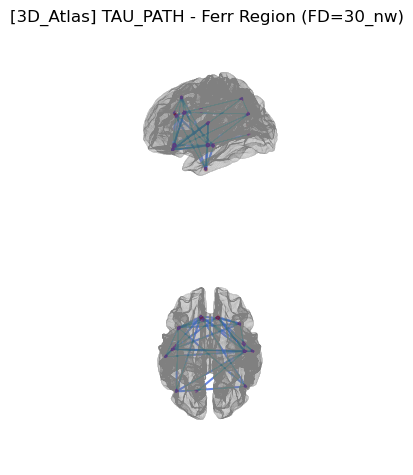

In [52]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_TAU_Drop_Ferr, CoM_Ferr_TAU_Drop, LabelNames_Ferr_TAU_Drop, 
                          markerVecTAU, colorVecTAU, gfap_ferritin_Fig, 
                          '[3D_Atlas] TAU_PATH - Ferr Region (FD=30_nw)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

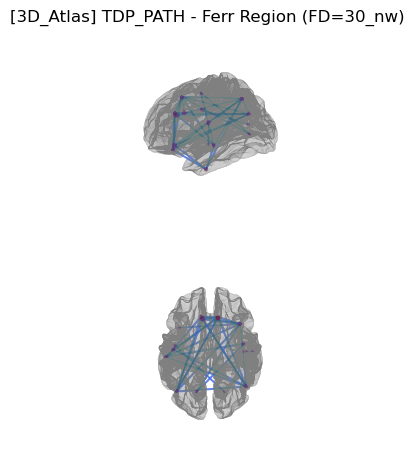

In [53]:
atlasMapping.atlasMapping(NetworkDataGeneral, cov_TDP_Drop_Ferr, CoM_Ferr_TDP_Drop, LabelNames_Ferr_TDP_Drop, 
                          markerVecTDP, colorVecTDP, gfap_ferritin_Fig, 
                          '[3D_Atlas] TDP_PATH - Ferr Region (FD=30_nw)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## [Ferr] Define Variables

### Define Vectors for Node Size and Node Color

In [54]:
# Log %AO of FTD TAU vs TDP
path_TAU_exp = Ferr_TAU_Drop.copy()
path_TDP_exp = Ferr_TDP_Drop.copy()

# Get min/max %AO of LBD
minPath = np.nanmin(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())))
maxPath = np.nanmax(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())) - minPath + 0.0015, axis=0)

# Size of Nodes --> Marker
markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
markerVecTAU = 3 * (markerVecTAU - minPath) / maxPath

markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
markerVecTDP = 3 * (markerVecTDP - minPath) / maxPath

cRange = [0, 1]

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(path_TAU_exp.shape[1])
colorVecTDP = np.ones(path_TDP_exp.shape[1])

## TAU

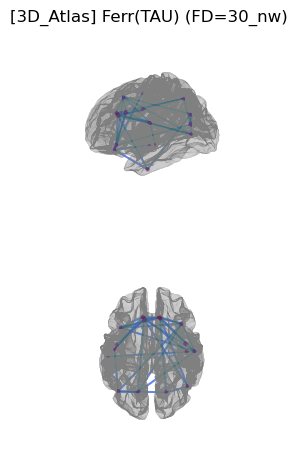

In [55]:
atlasMapping.atlasMapping(NetworkDataGeneral, covFerr_TAU_Drop, CoM_Ferr_TAU_Drop, LabelNames_Ferr_TAU_Drop, 
                          markerVecTAU, colorVecTAU, gfap_ferritin_Fig, 
                          '[3D_Atlas] Ferr(TAU) (FD=30_nw)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

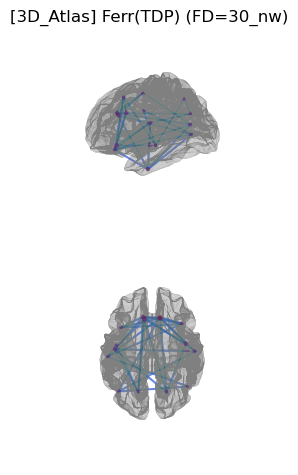

In [56]:
atlasMapping.atlasMapping(NetworkDataGeneral, covFerr_TDP_Drop, CoM_Ferr_TDP_Drop, LabelNames_Ferr_TDP_Drop, 
                          markerVecTDP, colorVecTDP, gfap_ferritin_Fig, 
                          '[3D_Atlas] Ferr(TDP) (FD=30_nw)', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### Ferritin

#### Hamming Distance

In [62]:
distanceGraph(PATH_TAU_Ferr_G_nw, PATH_TDP_Ferr_G_nw, 
              TAU_Ferr_G_nw, TDP_Ferr_G_nw, method="hamming", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 0.36666666666666664
** Distance between [Pathology TAU] vs [Ferritin TAU]: 0.38333333333333336
Distance between [Pathology TAU] vs [Ferritin TDP]: 0.3333333333333333
Distance between [Pathology TDP] vs [Ferritin TAU]: 0.38333333333333336
** Distance between [Pathology TDP] vs [Ferritin TDP]: 0.35
Distance between [Ferritin TAU] vs [Ferritin TDP]: 0.3333333333333333


#### Frobenius Distance

In [63]:
distanceGraph(PATH_TAU_Ferr_G_nw, PATH_TDP_Ferr_G_nw, 
              TAU_Ferr_G_nw, TDP_Ferr_G_nw, method="frob", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 9.38083151964686
** Distance between [Pathology TAU] vs [Ferritin TAU]: 9.591663046625438
Distance between [Pathology TAU] vs [Ferritin TDP]: 8.94427190999916
Distance between [Pathology TDP] vs [Ferritin TAU]: 9.591663046625438
** Distance between [Pathology TDP] vs [Ferritin TDP]: 9.16515138991168
Distance between [Ferritin TAU] vs [Ferritin TDP]: 8.94427190999916


#### JaccardDistance (Jaccard distance between edge sets)

In [64]:
distanceGraph(PATH_TAU_Ferr_G_nw, PATH_TDP_Ferr_G_nw, 
              TAU_Ferr_G_nw, TDP_Ferr_G_nw, method="jacc", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 0.8461538461538461
** Distance between [Pathology TAU] vs [Ferritin TAU]: 0.8679245283018868
Distance between [Pathology TAU] vs [Ferritin TDP]: 0.8
Distance between [Pathology TDP] vs [Ferritin TAU]: 0.8679245283018868
** Distance between [Pathology TDP] vs [Ferritin TDP]: 0.8235294117647058
Distance between [Ferritin TAU] vs [Ferritin TDP]: 0.8


#### NetSimile (Compares node signature distributions.)

In [65]:
distanceGraph(PATH_TAU_Ferr_G_nw, PATH_TDP_Ferr_G_nw, 
              TAU_Ferr_G_nw, TDP_Ferr_G_nw, method="NetSimile", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 6.101418050146628
** Distance between [Pathology TAU] vs [Ferritin TAU]: 11.191794991207384
Distance between [Pathology TAU] vs [Ferritin TDP]: 13.099829684535147
Distance between [Pathology TDP] vs [Ferritin TAU]: 9.578281050325316
** Distance between [Pathology TDP] vs [Ferritin TDP]: 13.38496138087595
Distance between [Ferritin TAU] vs [Ferritin TDP]: 13.410230375649212


#### GraphDiffusion (Find the maximally dissimilar diffusion kernels between two graphs)

In [67]:
distanceGraph(PATH_TAU_Ferr_G_nw, PATH_TDP_Ferr_G_nw, 
              TAU_Ferr_G_nw, TDP_Ferr_G_nw, method="graphdiff", protein_type='Ferritin')

Ferritin
Distance between [Pathology TAU] vs [Pathology TDP]: 1.6859652508690945
** Distance between [Pathology TAU] vs [Ferritin TAU]: 1.5202952564489505
Distance between [Pathology TAU] vs [Ferritin TDP]: 1.9043697930660155
Distance between [Pathology TDP] vs [Ferritin TAU]: 1.6949001725929087
** Distance between [Pathology TDP] vs [Ferritin TDP]: 1.7377488893678976
Distance between [Ferritin TAU] vs [Ferritin TDP]: 1.139507305693685
